<font color="284B97" size="8px">Titanic Survival prediction</font>

## Importing the required libraries

In [866]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

## Importing the data set

In [867]:
df1=pd.read_csv("train.csv")

df2=pd.read_csv("test.csv")
df=pd.concat([df1,df2])


C:\Users\abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [868]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## Checking for null values.

In [869]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## Check whether a passenger had a cabin or not.


In [870]:
df['has_cabin']=1

In [871]:
df.loc[df['Cabin'].isnull(),'has_cabin']=0

In [872]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,has_cabin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0


In [873]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,has_cabin
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838,0.225363
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592,0.417981
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,0.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000,1.000000


## Building and filling values in Title column

In [874]:
df['Title']=""

In [875]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,has_cabin,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,


In [876]:
df['Title']=df['Name'].apply(lambda x:re.search('([A-Z][a-z]+)\.',x).group(1))

In [877]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,has_cabin,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr


In [878]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
has_cabin         0
Title             0
dtype: int64

In [879]:
df.mean()

Age             29.881138
Fare            33.295479
Parch            0.385027
PassengerId    655.000000
Pclass           2.294882
SibSp            0.498854
Survived         0.383838
has_cabin        0.225363
dtype: float64

In [880]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
has_cabin         0
Title             0
dtype: int64

In [881]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [882]:
df.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
has_cabin         0
Title             0
dtype: int64

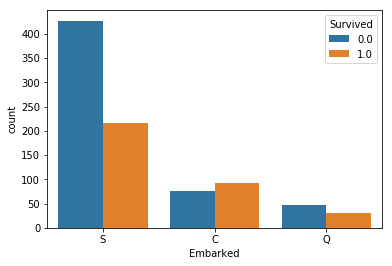

In [883]:
sns.countplot(df['Embarked'],hue=df['Survived'])

Since we have filled all the null values except Cabin and Embarked as they are string. If we observe, they are of no use so we can drop both the coulmns.

In [884]:
df.drop('Embarked',axis=1,inplace=True)

In [885]:
df.drop('Cabin',axis=1,inplace=True)

In [886]:
df['Categorical_age']=0

In [887]:
df['Categorical_fare']=0

In [888]:
df['Categorical_age']=pd.qcut(df['Age'],4,labels=[1,2,3,4])

Lets divide the fare also in 4 categories:
Where 1 represents the cheapest and 4 is the most expensive.

In [889]:
df['Categorical_fare']=pd.qcut(df['Fare'],4,labels=[1,2,3,4])

## Dropping Columns that are not required

In [890]:
df.head()

,Age,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,has_cabin,Title,Categorical_age,Categorical_fare
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr,1,1
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,4,4
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,2,2
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,3,4
4,35.0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,3,2


In [891]:
df.drop(['Name','PassengerId','Ticket','Age','Fare','SibSp','Parch'],axis=1,inplace=True)

In [892]:
df.head()

,Pclass,Sex,Survived,has_cabin,Title,Categorical_age,Categorical_fare
0,3,male,0.0,0,Mr,1,1
1,1,female,1.0,1,Mrs,4,4
2,3,female,1.0,0,Miss,2,2
3,1,female,1.0,1,Mrs,3,4
4,3,male,0.0,0,Mr,3,2


In [893]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [894]:
df.loc[((df['Title']!='Mr') & (df['Title']!='Mrs') & (df['Title']!='Miss') & (df['Title']!='Master')),'Title']=5

In [895]:
df.loc[df['Title']=='Mr','Title']=1
df.loc[df['Title']=='Miss','Title']=2
df.loc[df['Title']=='Mrs','Title']=3
df.loc[df['Title']=='Master','Title']=4


Getting numerical values for each string data using get_dummies function.

0. Represents female
1. Represents male

In [896]:
df['Sex']=pd.get_dummies(df['Sex'])['male']

In [897]:
df.head()

,Pclass,Sex,Survived,has_cabin,Title,Categorical_age,Categorical_fare
0,3,1,0.0,0,1,1,1
1,1,0,1.0,1,3,4,4
2,3,0,1.0,0,2,2,2
3,1,0,1.0,1,3,3,4
4,3,1,0.0,0,1,3,2


## Splitting and prediction on our model.

Importing libraries

In [898]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [899]:
from sklearn.metrics import accuracy_score,classification_report

Dividing into x and y values: Where x are the features and y is the output

In [900]:
df['Survived']=pd.Series(df['Survived'],dtype='int64')

In [901]:
x=df[0:891]

In [902]:
x=x.drop('Survived',axis=1)

In [903]:
y=df[0:891]['Survived']

In [904]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Lets initialize our model

In [905]:
model=LogisticRegression()

Fitting of our trainig data.

In [906]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Testing out model over a given set of test data

In [907]:
prediction=model.predict(x_test)

In [908]:
print(accuracy_score(y_test,prediction))


0.7686567164179104


## Lets drop the title column and check the accuracy then.


In [909]:
x=x.drop('Title',axis=1)

In [910]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction))


0.7947761194029851
